In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import svm
from keras.models import Sequential
from keras.layers import GlobalMaxPooling1D, Conv1D, Dense, Embedding, Dropout,MaxPooling1D, LSTM
import matplotlib.pyplot as plt
import numpy as np # linear algebra
from keras.callbacks import EarlyStopping
import keras
import keras.metrics
from keras import regularizers
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, f1_score
import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import tensorflow 
from tensorflow.python.lib.io import file_io


Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

../input/finaldata/YouTube_Dadvar_2014.csv
../input/finaldata/glove.6B.100d.txt


/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [2]:
data = pd.read_csv('../input/finaldata/YouTube_Dadvar_2014.csv')

In [3]:
data.head()

,UserIndex,Comments,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,Class,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,X1,Does N.e.bodyelse Hear her Crazy ass Screamin ...,10,1,3,3,0,15,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,X2,There are so many things that are incorrect wi...,3,0,6,5,0,31,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,X3,3:26 hahah my boyfriend showed this song to me...,7,0,3,5,0,43,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,X2218,dick beyonce fuck y a ass hole you are truely ...,34,0,3,5,0,44,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,X5,DongHaeTaemin and Kai ;A; luhansehun and bacon...,11,173,5,5,0,21,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(3464, 38)

In [5]:
data.ndim

2

In [6]:
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.shape

(3464, 9)

In [7]:
data.dtypes

UserIndex                object
Comments                 object
Number of Comments        int64
Number of Subscribers     int64
Membership Duration       int64
Number of Uploads         int64
Profanity in UserID       int64
Age                       int64
Class                     int64
dtype: object

In [8]:
data.isnull().any()

UserIndex                False
Comments                 False
Number of Comments       False
Number of Subscribers    False
Membership Duration      False
Number of Uploads        False
Profanity in UserID      False
Age                      False
Class                    False
dtype: bool

In [9]:
data.columns

Index(['UserIndex', 'Comments', 'Number of Comments', 'Number of Subscribers',
       'Membership Duration', 'Number of Uploads', 'Profanity in UserID',
       'Age', 'Class'],
      dtype='object')

In [10]:
data_dupli = data.drop_duplicates()
data=data_dupli
data.describe()

,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,Class
count,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.00000
mean,15.452367,304.318995,3.714781,10.288395,0.113164,24.879042,0.12067
std,10.862517,15520.532319,1.392837,28.646525,0.316839,13.286361,0.32579
min,1.000000,0.000000,2.000000,1.000000,0.000000,13.000000,0.00000
25%,6.000000,0.000000,3.000000,5.000000,0.000000,18.000000,0.00000
50%,14.000000,2.000000,3.000000,5.000000,0.000000,21.000000,0.00000
75%,23.000000,7.000000,4.000000,5.000000,0.000000,27.000000,0.00000
max,50.000000,912377.000000,9.000000,820.000000,1.000000,112.000000,1.00000


In [11]:
from sklearn.preprocessing import LabelEncoder
data['Class']=data['Class'].astype(str)
le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])

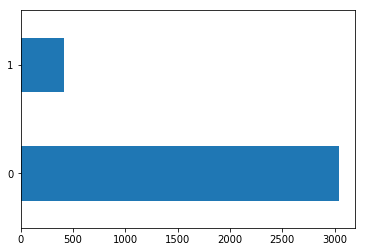

In [12]:
data['Class'].value_counts().plot(kind='barh')

In [13]:
import kernelprocess

df = kernelprocess.processing(data)
df.head()

,Comments,Class
0,do nebodyels hear crazi as screamin hoe every...,0
1,there mani thing incorrect comment unbeliev g...,0
2,hahah boyfriend show song me tooo be seizur o...,1
3,dick beyonc fuck as hole trueli dog bitch pha...,1
4,donghaetaemin kai a luhansehun bacon xd taemi...,0


In [14]:
from sklearn.utils import shuffle
file = shuffle(df, random_state=3)

In [15]:
Y = pd.DataFrame(file['Class'])
X = pd.DataFrame(file['Comments'])

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits= 10, random_state=42)

In [17]:
tfidf = TfidfVectorizer(ngram_range=(1,2)).fit_transform(X['Comments'].values)
y=Y['Class'].values

def Baseline(y, cv, tfidf):
    #SVM with tf-idf
    for train, test in cv.split(tfidf):  
        
        Xtrain, Xtest = tfidf[train], tfidf[test]
        Ytrain, Ytest = y[train], y[test]
        from imblearn.under_sampling import RandomUnderSampler

        rus = RandomUnderSampler()
        x_rus, y_rus = rus.fit_sample(Xtrain, Ytrain)
        
        SVM = svm.SVC(C=1.0, kernel='linear')
        SVM.fit(x_rus, y_rus)
        
        predict_SVM = SVM.predict(Xtest)
    
    return (x_rus, y_rus,Ytest, SVM, predict_SVM)
    

In [18]:
x_rus, y_rus,Ytest, SVM, predict_SVM = Baseline(y, cv,tfidf)
scoreSVM = cross_val_score(SVM, x_rus, y_rus, cv=10, scoring='recall')
print("SVM Accuracy Score -> ", scoreSVM)

SVM Accuracy Score ->  [0.68421053 0.52631579 0.42105263 0.48648649 0.56756757 0.48648649
 0.75675676 0.54054054 0.43243243 0.56756757]


In [19]:
def plot_model_history(model_history):
        fig, axs = plt.subplots(1,2,figsize=(15,5))
        # summarize history for accuracy
        axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
        axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
        axs[0].set_title('Model Accuracy')
        axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
        axs[0].legend(['train', 'test'], loc='best')
        # summarize history for loss
        axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
        axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
        axs[1].set_title('Model Loss')
        axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
        axs[1].legend(['train', 'test'], loc='best')
        plt.show()

In [20]:
tokenizer = Tokenizer(num_words=None, split=' ',lower=False)
tokenizer.fit_on_texts(X['Comments'].values)
x = tokenizer.texts_to_sequences(X['Comments'].values)
wordindex = tokenizer.word_index
vocab_size = len(wordindex) + 1
token = pad_sequences(x, padding  = 'post', maxlen = 3000) #max comment length

In [21]:
import keras.backend as K
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)


# load whole embedding into memory
print('Indexing word vectors.')
    
embeddings_index = {}
f = file_io.FileIO('../input/finaldata/glove.6B.100d.txt', mode='r')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
    
print('Found %s word vectors.' % len(embeddings_index))
#emb_dim could be a parameter
    
all_embs = np.stack(embeddings_index.values())
emb_mean = all_embs.mean() 
emb_std = all_embs.std() 
emb_mean,emb_std
emb_dim=100
embedding_matrix = np.random.normal(emb_mean, emb_std, (vocab_size, emb_dim ))
for word, i in wordindex.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: 
        embedding_matrix[i] = embedding_vector


Indexing word vectors.
Found 400000 word vectors.


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [22]:
from keras import backend as K

def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

In [23]:
 
cvscorescnn = []
for train, test in cv.split(token):  
    #print("TRAIN:", train, "Test:", test)
    Xtrain, Xtest = token[train], token[test]
    Ytrain, Ytest = y[train], y[test]
    #smote
    from imblearn.over_sampling import SMOTE
    sm = SMOTE(random_state=2)
    X_train_res, y_train_res = sm.fit_sample(Xtrain, Ytrain)    
    
    seed = 120
    np.random.seed(seed)
    model = Sequential()
    model.add(Embedding(vocab_size, 100, weights = [embedding_matrix], trainable=False, input_length = X_train_res.shape[1]))
    model.add(Conv1D(92, 5, activation='tanh'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(10, activation='tanh', kernel_regularizer = regularizers.l2(0.3)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',loss= 'binary_crossentropy',metrics=([recall]))#sentropy',loss= imbalancedloss
    
    batch_size = 110
    epochs = 4
    model_history = model.fit(X_train_res,y_train_res, validation_data=(Xtest, Ytest),epochs=epochs, batch_size=batch_size, verbose=1)
    y_pred = model.predict_classes(Xtest)
    score = model.evaluate(Xtest, Ytest, verbose=0)
    cvscorescnn.append(score[1])
print("CNN Accuracy Score -> ", cvscorescnn)


Train on 5480 samples, validate on 347 samples
Epoch 1/4
5480/5480 [==============================] - 3s 589us/step - loss: 4.8544 - recall: 0.4962 - val_loss: 3.7419 - val_recall: 0.9538
Epoch 2/4
5480/5480 [==============================] - 1s 215us/step - loss: 2.7976 - recall: 0.6839 - val_loss: 2.0902 - val_recall: 0.2272
Epoch 3/4
5480/5480 [==============================] - 1s 216us/step - loss: 1.6726 - recall: 0.7756 - val_loss: 1.3513 - val_recall: 0.3452
Epoch 4/4
5480/5480 [==============================] - 1s 217us/step - loss: 1.0843 - recall: 0.7804 - val_loss: 0.9158 - val_recall: 0.1920
Train on 5506 samples, validate on 347 samples
Epoch 1/4
5506/5506 [==============================] - 2s 388us/step - loss: 4.8128 - recall: 0.4907 - val_loss: 3.6856 - val_recall: 0.9060
Epoch 2/4
5506/5506 [==============================] - 1s 216us/step - loss: 2.7605 - recall: 0.6883 - val_loss: 2.0784 - val_recall: 0.2631
Epoch 3/4
5506/5506 [==============================] - 1s 21

In [24]:
cvscorescnnlstm = [] 
for train, test in cv.split(token):
    #print("TRAIN:", train, "Test:", test) 
    Xtrain, Xtest = token[train], token[test]
    Ytrain, Ytest = y[train], y[test]
    #smote 
    from imblearn.over_sampling import SMOTE
    sm = SMOTE(random_state=2) 
    X_train_res, y_train_res = sm.fit_sample(Xtrain, Ytrain)
    seed = 126
    np.random.seed(seed)
    model = Sequential()
    model.add(Embedding(vocab_size, 100, weights = [embedding_matrix], trainable=False, input_length = X_train_res.shape[1]))
    model.add(Conv1D(134, 5, activation='tanh'))
    model.add(MaxPooling1D(pool_size=3))
    model.add(Conv1D(114, 5, activation='tanh'))
    model.add(MaxPooling1D(pool_size=3))
    model.add(Dense(20, activation='tanh', kernel_regularizer = regularizers.l2(0.02)))
    model.add(Dropout(0.5))
    model.add(LSTM(94,return_sequences=True, activation='tanh'))#return_sequences=True
    model.add(Dropout(0.5))
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(0.5))
    model.add(Dense(10,activation = 'tanh', kernel_regularizer = regularizers.l2(0.02)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[recall])
    batch_size = 110
    epochs = 10
    
    model_history = model.fit(X_train_res, y_train_res, validation_data=(Xtest, Ytest), epochs=epochs, batch_size=batch_size, verbose=1 ,callbacks=[EarlyStopping(monitor='val_acc',patience=4, mode='max', min_delta = 0.001)])
    CLSTM = model.predict_classes(Xtest)
        
    scores2 = model.evaluate(Xtest, Ytest, verbose=0)
    cvscorescnnlstm.append(scores2[1])

print("CNN-LSTM Accuracy Score -> ",cvscorescnnlstm)


Train on 5480 samples, validate on 347 samples
Epoch 1/10
5480/5480 [==============================] - 29s 5ms/step - loss: 1.4703 - recall: 0.5444 - val_loss: 1.4294 - val_recall: 0.9274
Epoch 2/10


/opt/conda/lib/python3.6/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_recall,loss,recall
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


5480/5480 [==============================] - 26s 5ms/step - loss: 1.0875 - recall: 0.6008 - val_loss: 1.0724 - val_recall: 0.8331
Epoch 3/10
5480/5480 [==============================] - 26s 5ms/step - loss: 0.8795 - recall: 0.5878 - val_loss: 0.8266 - val_recall: 0.6398
Epoch 4/10
5480/5480 [==============================] - 26s 5ms/step - loss: 0.7574 - recall: 0.5688 - val_loss: 0.7599 - val_recall: 0.2206
Epoch 5/10
5480/5480 [==============================] - 26s 5ms/step - loss: 0.6469 - recall: 0.5538 - val_loss: 0.6330 - val_recall: 0.0515
Epoch 6/10
5480/5480 [==============================] - 26s 5ms/step - loss: 0.5618 - recall: 0.6374 - val_loss: 0.6042 - val_recall: 0.0977
Epoch 7/10
5480/5480 [==============================] - 26s 5ms/step - loss: 0.4873 - recall: 0.7054 - val_loss: 0.5996 - val_recall: 0.2338
Epoch 8/10
5480/5480 [==============================] - 27s 5ms/step - loss: 0.4282 - recall: 0.7424 - val_loss: 0.5684 - val_recall: 0.0634
Epoch 9/10
5480/5480 [==

/opt/conda/lib/python3.6/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_recall,loss,recall
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


5506/5506 [==============================] - 27s 5ms/step - loss: 1.0921 - recall: 0.5902 - val_loss: 0.9947 - val_recall: 0.5334
Epoch 3/10
5506/5506 [==============================] - 27s 5ms/step - loss: 0.8777 - recall: 0.5666 - val_loss: 0.8645 - val_recall: 0.5285
Epoch 4/10
5506/5506 [==============================] - 27s 5ms/step - loss: 0.6910 - recall: 0.6172 - val_loss: 0.6871 - val_recall: 0.0507
Epoch 5/10
5506/5506 [==============================] - 27s 5ms/step - loss: 0.5619 - recall: 0.6641 - val_loss: 0.7822 - val_recall: 0.4184
Epoch 6/10
5506/5506 [==============================] - 27s 5ms/step - loss: 0.4976 - recall: 0.7237 - val_loss: 0.6651 - val_recall: 0.1766
Epoch 7/10
5506/5506 [==============================] - 27s 5ms/step - loss: 0.4654 - recall: 0.7315 - val_loss: 0.5942 - val_recall: 0.0903
Epoch 8/10
5506/5506 [==============================] - 27s 5ms/step - loss: 0.6859 - recall: 0.8347 - val_loss: 0.9060 - val_recall: 1.0000
Epoch 9/10
5506/5506 [==

/opt/conda/lib/python3.6/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_recall,loss,recall
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


5474/5474 [==============================] - 26s 5ms/step - loss: 1.0873 - recall: 0.6168 - val_loss: 1.0543 - val_recall: 0.6907
Epoch 3/10
5474/5474 [==============================] - 26s 5ms/step - loss: 0.8598 - recall: 0.5815 - val_loss: 0.8160 - val_recall: 0.2790
Epoch 4/10
5474/5474 [==============================] - 26s 5ms/step - loss: 0.6800 - recall: 0.6188 - val_loss: 0.7206 - val_recall: 0.2294
Epoch 5/10
5474/5474 [==============================] - 26s 5ms/step - loss: 0.5593 - recall: 0.6932 - val_loss: 0.7705 - val_recall: 0.4688
Epoch 6/10
5474/5474 [==============================] - 26s 5ms/step - loss: 0.5227 - recall: 0.7041 - val_loss: 0.6782 - val_recall: 0.3323
Epoch 7/10
5474/5474 [==============================] - 26s 5ms/step - loss: 0.4442 - recall: 0.7308 - val_loss: 0.5637 - val_recall: 0.1345
Epoch 8/10
5474/5474 [==============================] - 26s 5ms/step - loss: 0.4267 - recall: 0.7503 - val_loss: 0.5292 - val_recall: 0.1718
Epoch 9/10
5474/5474 [==

/opt/conda/lib/python3.6/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_recall,loss,recall
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


5484/5484 [==============================] - 26s 5ms/step - loss: 1.0862 - recall: 0.5930 - val_loss: 1.0766 - val_recall: 0.6946
Epoch 3/10
5484/5484 [==============================] - 26s 5ms/step - loss: 0.8748 - recall: 0.5748 - val_loss: 0.8973 - val_recall: 0.5381
Epoch 4/10
5484/5484 [==============================] - 26s 5ms/step - loss: 0.7324 - recall: 0.6089 - val_loss: 0.6526 - val_recall: 0.0748
Epoch 5/10
5484/5484 [==============================] - 26s 5ms/step - loss: 0.5694 - recall: 0.6635 - val_loss: 0.7669 - val_recall: 0.3918
Epoch 6/10
5484/5484 [==============================] - 26s 5ms/step - loss: 0.5194 - recall: 0.7079 - val_loss: 0.6259 - val_recall: 0.3572
Epoch 7/10
5484/5484 [==============================] - 26s 5ms/step - loss: 0.5474 - recall: 0.6540 - val_loss: 0.5914 - val_recall: 0.1673
Epoch 8/10
5484/5484 [==============================] - 27s 5ms/step - loss: 0.4650 - recall: 0.7061 - val_loss: 0.5936 - val_recall: 0.2324
Epoch 9/10
5484/5484 [==

/opt/conda/lib/python3.6/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_recall,loss,recall
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


5476/5476 [==============================] - 26s 5ms/step - loss: 1.0940 - recall: 0.5864 - val_loss: 1.0468 - val_recall: 0.6901
Epoch 3/10
5476/5476 [==============================] - 26s 5ms/step - loss: 0.8590 - recall: 0.5539 - val_loss: 0.9413 - val_recall: 0.7233
Epoch 4/10
5476/5476 [==============================] - 26s 5ms/step - loss: 0.6929 - recall: 0.6048 - val_loss: 0.6652 - val_recall: 0.1373
Epoch 5/10
5476/5476 [==============================] - 26s 5ms/step - loss: 0.5666 - recall: 0.6704 - val_loss: 0.6312 - val_recall: 0.2304
Epoch 6/10
5476/5476 [==============================] - 26s 5ms/step - loss: 0.5172 - recall: 0.6910 - val_loss: 0.6203 - val_recall: 0.2503
Epoch 7/10
5476/5476 [==============================] - 26s 5ms/step - loss: 0.4588 - recall: 0.7289 - val_loss: 0.5712 - val_recall: 0.2015
Epoch 8/10
5476/5476 [==============================] - 26s 5ms/step - loss: 0.4183 - recall: 0.7505 - val_loss: 0.7703 - val_recall: 0.4249
Epoch 9/10
5476/5476 [==

/opt/conda/lib/python3.6/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_recall,loss,recall
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


5492/5492 [==============================] - 28s 5ms/step - loss: 1.0947 - recall: 0.5935 - val_loss: 1.0408 - val_recall: 0.8264
Epoch 3/10
5492/5492 [==============================] - 27s 5ms/step - loss: 0.8828 - recall: 0.5416 - val_loss: 0.8939 - val_recall: 0.7596
Epoch 4/10
5492/5492 [==============================] - 27s 5ms/step - loss: 0.7528 - recall: 0.5686 - val_loss: 0.7044 - val_recall: 0.2795
Epoch 5/10
5492/5492 [==============================] - 27s 5ms/step - loss: 0.5907 - recall: 0.6796 - val_loss: 0.5498 - val_recall: 0.2127
Epoch 6/10
5492/5492 [==============================] - 26s 5ms/step - loss: 0.5195 - recall: 0.6976 - val_loss: 0.7494 - val_recall: 0.3830
Epoch 7/10
5492/5492 [==============================] - 27s 5ms/step - loss: 0.4558 - recall: 0.7506 - val_loss: 0.5355 - val_recall: 0.0848
Epoch 8/10
5492/5492 [==============================] - 27s 5ms/step - loss: 0.3991 - recall: 0.7838 - val_loss: 0.5007 - val_recall: 0.1092
Epoch 9/10
5492/5492 [==

/opt/conda/lib/python3.6/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_recall,loss,recall
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


5474/5474 [==============================] - 27s 5ms/step - loss: 1.0861 - recall: 0.5829 - val_loss: 0.9806 - val_recall: 0.7038
Epoch 3/10
5474/5474 [==============================] - 28s 5ms/step - loss: 0.8672 - recall: 0.5747 - val_loss: 0.8194 - val_recall: 0.2527
Epoch 4/10
5474/5474 [==============================] - 27s 5ms/step - loss: 0.7019 - recall: 0.5856 - val_loss: 0.8853 - val_recall: 0.4712
Epoch 5/10
5474/5474 [==============================] - 27s 5ms/step - loss: 0.5779 - recall: 0.6562 - val_loss: 0.6247 - val_recall: 0.0668
Epoch 6/10
5474/5474 [==============================] - 27s 5ms/step - loss: 0.5012 - recall: 0.7044 - val_loss: 0.5726 - val_recall: 0.0668
Epoch 7/10
5474/5474 [==============================] - 26s 5ms/step - loss: 0.4470 - recall: 0.7205 - val_loss: 0.6145 - val_recall: 0.2565
Epoch 8/10
5474/5474 [==============================] - 26s 5ms/step - loss: 0.4109 - recall: 0.7471 - val_loss: 0.5468 - val_recall: 0.1158
Epoch 9/10
5474/5474 [==

/opt/conda/lib/python3.6/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_recall,loss,recall
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


5470/5470 [==============================] - 26s 5ms/step - loss: 1.0770 - recall: 0.6091 - val_loss: 0.9886 - val_recall: 0.3748
Epoch 3/10
5470/5470 [==============================] - 26s 5ms/step - loss: 0.8526 - recall: 0.5894 - val_loss: 0.9344 - val_recall: 0.5231
Epoch 4/10
5470/5470 [==============================] - 27s 5ms/step - loss: 0.6629 - recall: 0.6472 - val_loss: 0.6840 - val_recall: 0.2428
Epoch 5/10
5470/5470 [==============================] - 27s 5ms/step - loss: 0.6116 - recall: 0.6350 - val_loss: 0.7908 - val_recall: 0.2750
Epoch 6/10
5470/5470 [==============================] - 26s 5ms/step - loss: 0.5177 - recall: 0.6860 - val_loss: 0.7178 - val_recall: 0.2013
Epoch 7/10
5470/5470 [==============================] - 26s 5ms/step - loss: 0.4770 - recall: 0.7153 - val_loss: 0.5180 - val_recall: 0.0318
Epoch 8/10
5470/5470 [==============================] - 26s 5ms/step - loss: 0.4383 - recall: 0.7419 - val_loss: 0.6728 - val_recall: 0.1002
Epoch 9/10
5470/5470 [==

/opt/conda/lib/python3.6/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_recall,loss,recall
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


5482/5482 [==============================] - 27s 5ms/step - loss: 1.0844 - recall: 0.5598 - val_loss: 1.0452 - val_recall: 0.7197
Epoch 3/10
5482/5482 [==============================] - 27s 5ms/step - loss: 0.8580 - recall: 0.5564 - val_loss: 0.7870 - val_recall: 0.1432
Epoch 4/10
5482/5482 [==============================] - 27s 5ms/step - loss: 0.6777 - recall: 0.6181 - val_loss: 0.6867 - val_recall: 0.1852
Epoch 5/10
5482/5482 [==============================] - 28s 5ms/step - loss: 0.5619 - recall: 0.6923 - val_loss: 0.6519 - val_recall: 0.2114
Epoch 6/10
5482/5482 [==============================] - 27s 5ms/step - loss: 0.4829 - recall: 0.7213 - val_loss: 0.7708 - val_recall: 0.3494
Epoch 7/10
5482/5482 [==============================] - 27s 5ms/step - loss: 0.4617 - recall: 0.7387 - val_loss: 0.6065 - val_recall: 0.1852
Epoch 8/10
5482/5482 [==============================] - 27s 5ms/step - loss: 0.3923 - recall: 0.7882 - val_loss: 0.6480 - val_recall: 0.2114
Epoch 9/10
5482/5482 [==

/opt/conda/lib/python3.6/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_recall,loss,recall
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


5490/5490 [==============================] - 27s 5ms/step - loss: 1.0831 - recall: 0.6079 - val_loss: 1.0257 - val_recall: 0.7438
Epoch 3/10
5490/5490 [==============================] - 27s 5ms/step - loss: 0.8485 - recall: 0.5745 - val_loss: 0.8472 - val_recall: 0.5679
Epoch 4/10
5490/5490 [==============================] - 26s 5ms/step - loss: 0.6705 - recall: 0.6294 - val_loss: 0.7810 - val_recall: 0.4541
Epoch 5/10
5490/5490 [==============================] - 27s 5ms/step - loss: 0.5852 - recall: 0.6543 - val_loss: 0.6946 - val_recall: 0.1952
Epoch 6/10
5490/5490 [==============================] - 27s 5ms/step - loss: 0.5140 - recall: 0.7083 - val_loss: 0.6217 - val_recall: 0.1085
Epoch 7/10
5490/5490 [==============================] - 27s 5ms/step - loss: 0.4718 - recall: 0.7243 - val_loss: 0.5652 - val_recall: 0.0887
Epoch 8/10
5490/5490 [==============================] - 27s 5ms/step - loss: 0.5251 - recall: 0.7708 - val_loss: 1.7835 - val_recall: 0.8684
Epoch 9/10
5490/5490 [==

In [25]:
#Friedman ChiSquare Test 

from scipy.stats import friedmanchisquare
stats, p_value = friedmanchisquare(scoreSVM, cvscorescnn, cvscorescnnlstm)
print('Statistics=%.3f, p=%.3f'%(stats, p_value))
# interpret
alpha = 0.05
if p_value > alpha:
    print('fail to reject H0')
else:
    print('reject H0')

Statistics=13.282, p=0.001
reject H0
